In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from stock import Binomial_stock
from tqdm import trange
from utils import episodes_50
import random
import matplotlib.pyplot as plt
from ddpg import ddpgAgent
from utils import true_delta


In [31]:
eposide = 18000
# env = Binomial_stock(S0=50, rf=0, sigma=0.1, n_step=10)
random.seed(24)

ddpg_agent = ddpgAgent(alpha=0.0003, beta=0.0003, input_dim=[2], tau=0.001)

best_test_50 = -100

test_scores_ddpg = []
for i in range(eposide):

    env = Binomial_stock(S0=50, rf=0.05, sigma=0.3, n_step=60)
    done = False
    score = 0
    state = env.reset()
    while not done:
        action = ddpg_agent.choose_action(state)
        next_state, reward, done = env.step(action, state)
        ddpg_agent.remember(state, action, reward, next_state, int(done))
        ddpg_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50(ddpg_agent, S=50, r=0.05, sigma=0.3, n_step=60)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            ddpg_agent.save_models()

        test_scores_ddpg.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

episode  99 score -5.40 50 test average score -10.86
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  199 score -3.75 50 test average score -4.08
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  299 score -6.62 50 test average score -5.05
episode  399 score -5.59 50 test average score -1.53
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  499 score -3.01 50 test average score -1.14
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  599 score -4.47 50 test average score -1.91
episode  699 score -3.93 50 test average score -1.51
episode  799 score -5.46 50 test average score -1.20
episode  899 score -7.76 50 test average

episode  11299 score -3.12 50 test average score -0.60
episode  11399 score -5.50 50 test average score -0.42
episode  11499 score -11.22 50 test average score -0.46
episode  11599 score -2.06 50 test average score -0.61
episode  11699 score -4.37 50 test average score -0.36
episode  11799 score -1.00 50 test average score -0.47
episode  11899 score -1.91 50 test average score -0.56
episode  11999 score -3.46 50 test average score -0.35
episode  12099 score -23.20 50 test average score -0.64
episode  12199 score -1.70 50 test average score -0.26
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  12299 score -2.75 50 test average score -0.32
episode  12399 score -6.35 50 test average score -0.70
episode  12499 score -6.10 50 test average score -0.24
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
episode  12599 

In [32]:
import pickle
torch.save(ddpg_agent, r'./final_ddpg_agent.pth')
open_file = open('./test_scores_ddpg.pkl', "wb")
pickle.dump(trail_scores_ddpg, open_file)
open_file.close()


In [33]:
ddpg_agent.load_models()

t_delta = []
agent_delta = []
for i in range(400, 600):
    St = i/10
    env = Binomial_stock(S0=St, rf=0.05, sigma=0.3, n_step=60)
    t_delta.append(np.abs(env.true_delta()))
    observation = np.array([0,St])
    agent_delta.append(ddpg_agent.final_action(observation))

--- loading the best model ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


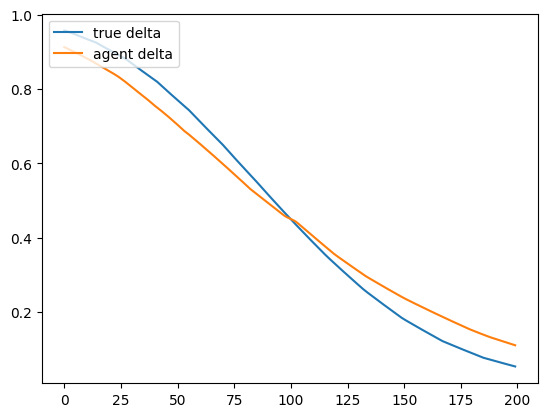

In [34]:
plt.plot(t_delta, label='true delta')
plt.plot(agent_delta, label='agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

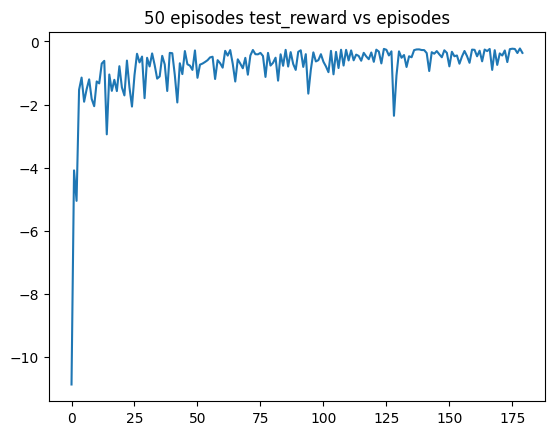

In [37]:
plt.plot(test_scores_ddpg)
plt.title('50 episodes test_reward vs episodes')